## Car Fuel Economy Analysis

###### Exercise description

In addition to this document, you will find two files in this directory:

-	cars_data.csv
-	cars_description.csv

The first file lists 11 characteristics for 32 different car models, and the second file explains these characteristics. We want to use this data set to investigate the following problem:

**Does the type of transmission influence a car’s fuel efficiency?**

It is not necessary to do the full analysis, but you may do some exploratory work in order to address the following points:

1. Describe your overall strategy to solve a problem like this.
2.	Are there any expectations you can form before starting this analysis? 
3.	Do you think that this analysis requires data preparation or data transformation?
4.	Which methods and/or models would you use to solve this problem?

*IMPORTANT:*

- Please provide detailed answers in written form and add results from your exploratory work, if you think that these results underpin your arguments. 
- You should spend 3-4 hours on this exercise.


______________
##### Step - 1
--------------

**Load, Inspect and Substitute values in Dataset from given input file**

In [1]:
import pandas as pd
import seaborn as sns

col_names = ['Make', 'MPG', 'CYL', 'Displacement', 'Gross HP', 'R-Axle-Ratio','Weight','1/4 mile time','Eng Shape','Transmission','F-Gears','Carburetors']
trans_map = {0:'Auto', 1:'Manual'}          # Automatic and Manual - Transmission Types
eng_map   = {0:'V', 1:'S'}          # 'V' and 'S' for engine types

df_cars_labels = pd.read_csv('cars_description.csv')
df_cars_data = pd.read_csv('cars_data.csv').dropna()
df_cars_data.columns = col_names

df = df_cars_data
df_cars_data.head()

#df_cars_data['Transmission'] = df_cars_data['Transmission'].map(trans_map)
#df_cars_data['Eng Shape'] = df_cars_data['Eng Shape'].map(eng_map)
#df_cars_labels

,Make,MPG,CYL,Displacement,Gross HP,R-Axle-Ratio,Weight,1/4 mile time,Eng Shape,Transmission,F-Gears,Carburetors
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [2]:
# Scaling the numeric columns (feature engineering)

# 1 - Applying SK Learns MaxAbScaler to scale the features
# 2 - Apply KMeans clustering on each cluster for fitting
# 3 - Distribute clusters into given count


from sklearn import preprocessing
from sklearn.cluster import KMeans

def kmeans_cluster(df, n_clusters=2):
    model = KMeans(n_clusters=n_clusters, random_state=1)
    clusters = model.fit_predict(df)
    cluster_results = df.copy()
    cluster_results['Cluster'] = clusters
    return cluster_results

def summarize_clustering(results):
    cluster_size = results.groupby(['Cluster']).size().reset_index()
    cluster_size.columns = ['Cluster', 'Count']
    cluster_means = results.groupby(['Cluster'], as_index=False).mean()
    cluster_summary = pd.merge(cluster_size, cluster_means, on='Cluster')
    return cluster_summary


cluster_columns = ['MPG','Displacement','CYL','Gross HP','Transmission',
                   'R-Axle-Ratio','Weight','1/4 mile time',
                   'F-Gears','Carburetors']

scaler = preprocessing.MaxAbsScaler()
vehicle_clusters = scaler.fit_transform(df_cars_data[cluster_columns])
vehicle_clusters = pd.DataFrame(vehicle_clusters, columns=cluster_columns)

#cluster_results = kmeans_cluster(vehicle_clusters, 4)
#cluster_summary = summarize_clustering(cluster_results)
#cluster_summary

vehicle_clusters.head()


,MPG,Displacement,CYL,Gross HP,Transmission,R-Axle-Ratio,Weight,1/4 mile time,F-Gears,Carburetors
0,0.619469,0.338983,0.75,0.328358,1.0,0.791075,0.483038,0.718777,0.8,0.500
1,0.619469,0.338983,0.75,0.328358,1.0,0.791075,0.530052,0.743231,0.8,0.500
2,0.672566,0.228814,0.50,0.277612,1.0,0.780933,0.427729,0.812664,0.8,0.125
3,0.631268,0.546610,0.75,0.328358,0.0,0.624746,0.592736,0.848908,0.6,0.125
4,0.551622,0.762712,1.00,0.522388,0.0,0.638945,0.634218,0.743231,0.6,0.250


##### Step - 2
--------------
**Dropped Unnecessary Columns (or Noise)**

In [3]:
cols_dropped = ['Make']

df = df_cars_data.drop(cols_dropped, axis=1)
df1 = df
df1['Transmission'] = df1['Transmission'].map(trans_map)
df.head()

,MPG,CYL,Displacement,Gross HP,R-Axle-Ratio,Weight,1/4 mile time,Eng Shape,Transmission,F-Gears,Carburetors
0,21.0,6,160.0,110,3.90,2.620,16.46,0,Manual,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,Manual,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,Manual,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,Auto,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,Auto,3,2


##### Step - 3
--------------
**Comparative Data Analysis**
* Comparing fuel consumption with various other features, such as;
    * Gross Horsepower
    * Engine Shape
    * Displacement
    * Weight

In [4]:
import plotly
import plotly.graph_objs as go
import plotly.plotly as py
import plotly.tools as tls
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

y0 = df_cars_data["MPG"].where(df_cars_data["Transmission"] == 0)
y1 = df_cars_data["MPG"].where(df_cars_data["Transmission"] == 1)   

Automatic = go.Box(y=y0,name='Automatic')               #marker=dict(color='rgb(8, 81, 156)',)
Manual = go.Box(y=y1,name='Manual')                     #marker=dict(color='rgb(10, 140, 208)',

layout = go.Layout(
    title = "MPG v/s Transmission Type", 
    yaxis = dict(title='Miles / Gallon', zeroline=False),
    xaxis = dict(title='Transmission Type', zeroline=False)
    )

data = [Manual, Automatic]
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

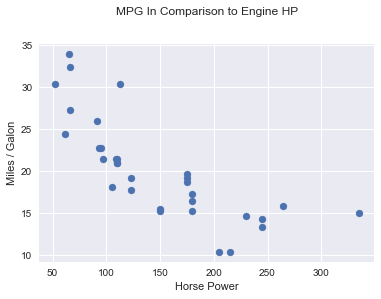

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(df['Gross HP'], df['MPG'])
plt.ylabel('Miles / Galon')
plt.xlabel('Horse Power')
plt.title('MPG In Comparison to Engine HP\n\n')
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression

# Applying multi-variable Linear Regression model (from Scikit Learn) to assess which independent variables are 
# to be considered for finding out how vehicle's fuel economy behave against that. LR can be applied in its simplest
# one by one, testing which feature or characterstic has more affect on fuel consumption. It is just one way or another
# to do the exercise of applying ML models on dataset.

cols = ['MPG','Make']
X = df_cars_data.drop(cols, axis=1)
#X = vehicle_clusters.drop('MPG', axis=1)

LR = LinearRegression()
LR.fit(X, df_cars_data['MPG'])

print ("Estimated intercept co-eficient .... ", LR.intercept_)
print ("No of co-eficients .... ", len(LR.coef_))

coefs_df = pd.DataFrame(list(zip(X.columns, LR.coef_)), columns = ['Vehicle Features','Co-efficients'])

coefs_df


Estimated intercept co-eficient ....  12.303374156
No of co-eficients ....  10


,Vehicle Features,Co-efficients
0,CYL,-0.111440
1,Displacement,0.013335
2,Gross HP,-0.021482
3,R-Axle-Ratio,0.787111
4,Weight,-3.715304
5,1/4 mile time,0.821041
6,Eng Shape,0.317763
7,Transmission,2.520227
8,F-Gears,0.655413
9,Carburetors,-0.199419


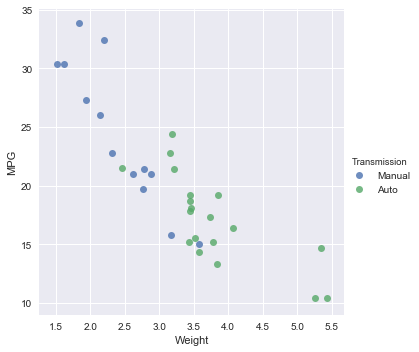

In [7]:
#sns.pairplot(df_cars_data[numeric_fields], hue='MPG', size=3)
numeric_fields = ['MPG','Displacement','CYL','Gross HP','Transmission',
                  'R-Axle-Ratio','Weight','1/4 mile time','F-Gears','Carburetors']


sns.lmplot('Weight', 'MPG', data=df1, hue='Transmission', size=5, fit_reg=False)

#### Conclusion

Having this exploration in place, I can conclude that transmission type does affect car’s fuel efficiency. This is evident from the above charts where we can see that "Automatic" Vehicles has MPG values ranges from 5.5 to 25, whereas manual transmission has MPG range from 15 to 35. There are other factors from the dataset which may impact fuel efficiency of the car (say; weight) and the key to find those other factors is to apply the relevant and proven technique(s) which should enable us to see the perfect relationship involving all independent variables and their covariance over the prediction (i.e. dependent variable).